# Clustering

## Import

In [115]:
import pandas as pd
import numpy as np

import plotly
import plotly.graph_objs as go
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, cophenet, centroid
from scipy.spatial.distance import pdist
import scipy.sparse as sp
from scipy import ndimage
from sklearn.cluster import KMeans, AgglomerativeClustering

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (50,20)

## Read File

In [116]:
humidity = pd.read_csv('dataClean/humidity.csv', sep=',')
pressure = pd.read_csv('dataClean/pressure.csv', sep=',')
temperature = pd.read_csv('dataClean/temperature.csv', sep=',')

## Search Mean Func

In [117]:
def Mean(listDataFrame):
    listDataFrame = listDataFrame.drop('datetime', 1)
    return np.mean(listDataFrame, axis = 0) 

### Search Mean

In [118]:
humidity = Mean(humidity)
pressure = Mean(pressure)
temperature = Mean(temperature)

## Visualization Data

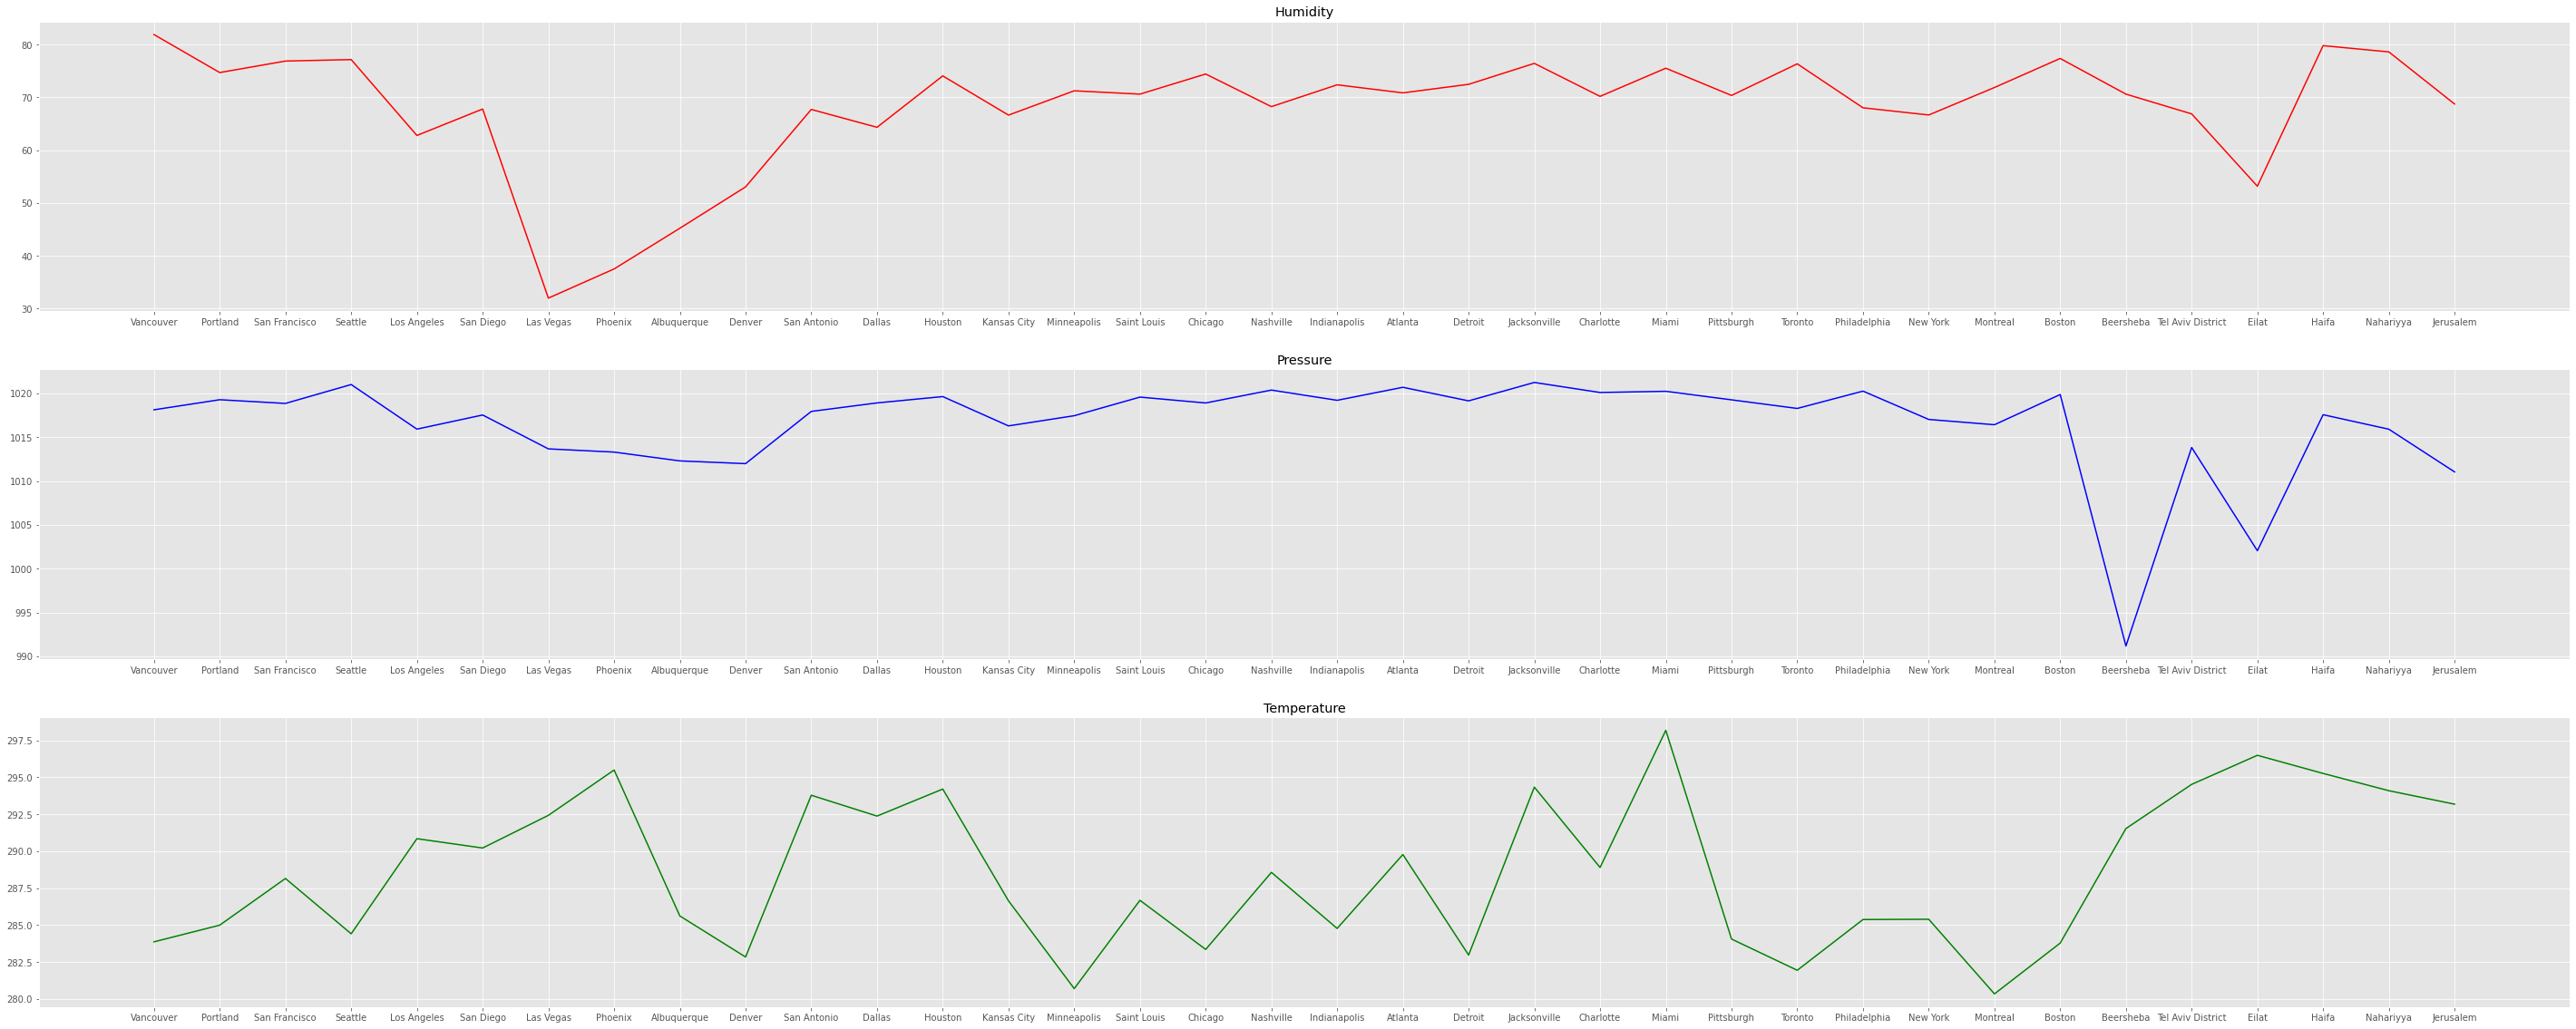

In [119]:
fig, axes = plt.subplots(3)
axes[0].set_title("Humidity")
axes[0].plot(humidity, color='red')
axes[1].set_title("Pressure")
axes[1].plot(pressure, color='blue')
axes[2].set_title("Temperature")
axes[2].plot(temperature, color='green')
plt.show()


In [120]:
concatDF = pd.DataFrame([humidity, pressure, temperature], ['humidity', 'pressure', 'temperature']).T
fig1 = go.Scatter3d(x=concatDF['humidity'], y=concatDF['pressure'], z=concatDF['temperature'],
                    marker=dict(opacity=0.9, reversescale=True, colorscale='Blues', size=5), line=dict (width=0.02), mode='markers')
mylayout = go.Layout(scene=dict(xaxis=dict( title="Humidity"), yaxis=dict( title="Pressure"), zaxis=dict( title="Temperature")),)
#  auto_open=True,
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     filename=("3DPlot.html"))

,humidity,pressure,temperature
Vancouver,81.899697,1018.118666,283.865067
Portland,74.700617,1019.268358,284.992929
San Francisco,76.877643,1018.846684,288.153090
Seattle,77.158023,1021.001215,284.409599
Los Angeles,62.774601,1015.913221,290.846126
San Diego,67.786445,1017.526330,290.215039
Las Vegas,31.938987,1013.660310,292.424878
Phoenix,37.470422,1013.293439,295.493325
Albuquerque,45.183236,1012.289240,285.617865
Denver,53.021656,1011.976642,282.839410


## Normalise Data

In [121]:
X = concatDF.values
X = X.astype(float)
X = (X - X.mean(axis = 0))/X.std(axis = 0)
X.mean(axis = 0)

array([-5.24271984e-17, -5.75249724e-14,  6.41462192e-16])

## Methods and Metrics

In [122]:
metrics = ['euclidean', 'minkowski', 'seuclidean', 'sqeuclidean', 'cosine', 'correlation', 'canberra', 'braycurtis', 'chebychev', 'cityblock', 'mahalanobis']
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
distanceMetrics = {}
resultCoef = []
clusterWay = []
for metric in metrics:
    distanceMetrics[metric] = pdist(X, metric)

In [123]:
matrix = [ [ 0 for i in range(len(methods)) ] for j in range(len(metrics)) ]
for metric in metrics:
    distanceMetric = pdist(X, metric)
    for method in methods:
        linkageMain = linkage(distanceMetric, method)
        coef = cophenet(linkageMain, distanceMetric)[0]
        resultCoef.append(coef)
        clusterWay.append([metric, method])
        matrix[metrics.index(metric)][methods.index(method)] = coef

metricsMethodsDF = pd.DataFrame(matrix, columns=methods, index=metrics)
metricsMethodsDF.head(50)

,single,complete,average,weighted,centroid,median,ward
euclidean,0.870161,0.851822,0.892216,0.885334,0.896373,0.891100,0.805937
minkowski,0.870161,0.851822,0.892216,0.885334,0.896373,0.891100,0.805937
seuclidean,0.870161,0.851822,0.892216,0.885334,0.896373,0.891100,0.805937
sqeuclidean,0.884542,0.818283,0.861588,0.856219,0.861320,0.853784,0.783667
cosine,0.710411,0.753858,0.773254,0.800610,0.771471,0.790917,0.774552
correlation,0.925069,0.896678,0.934006,0.932626,0.933400,0.929183,0.930588
canberra,0.760933,0.674524,0.829857,0.799653,0.827305,0.734436,0.748200
braycurtis,0.440963,0.551695,0.573240,0.571532,0.570916,0.570698,0.549279
chebychev,0.837122,0.799045,0.838947,0.834278,0.837795,0.826674,0.768009
cityblock,0.859430,0.877415,0.885067,0.882233,0.883523,0.880576,0.618072


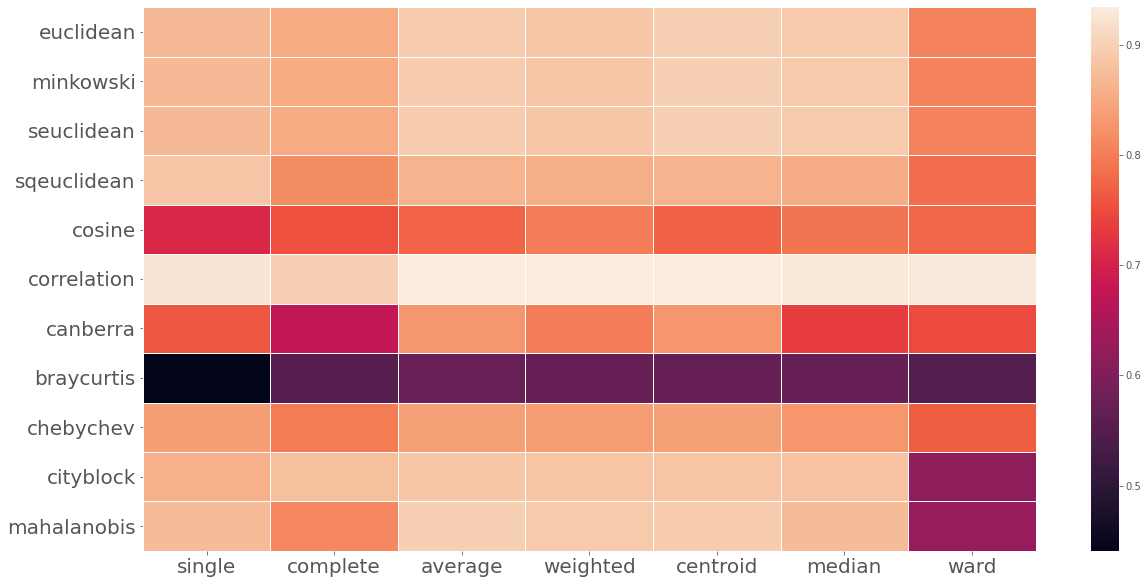

In [124]:
fig = plt.figure(figsize=(20, 10))
ax = sns.heatmap(metricsMethodsDF, linewidth=0.5)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [125]:
maxCoef = max(resultCoef)
minCoef = min(resultCoef)
indexMaxCoef = resultCoef.index(maxCoef)
indexMinCoef = resultCoef.index(minCoef)
print(f'MAX -> [{clusterWay[indexMaxCoef][0]} - {clusterWay[indexMaxCoef][1]}] == {maxCoef}')
print(f'MIN -> [{clusterWay[indexMinCoef][0]} - {clusterWay[indexMinCoef][1]}] == {minCoef}')

MAX -> [correlation - average] == 0.9340058577029634
MIN -> [braycurtis - single] == 0.44096333522937164


## Dendrogram

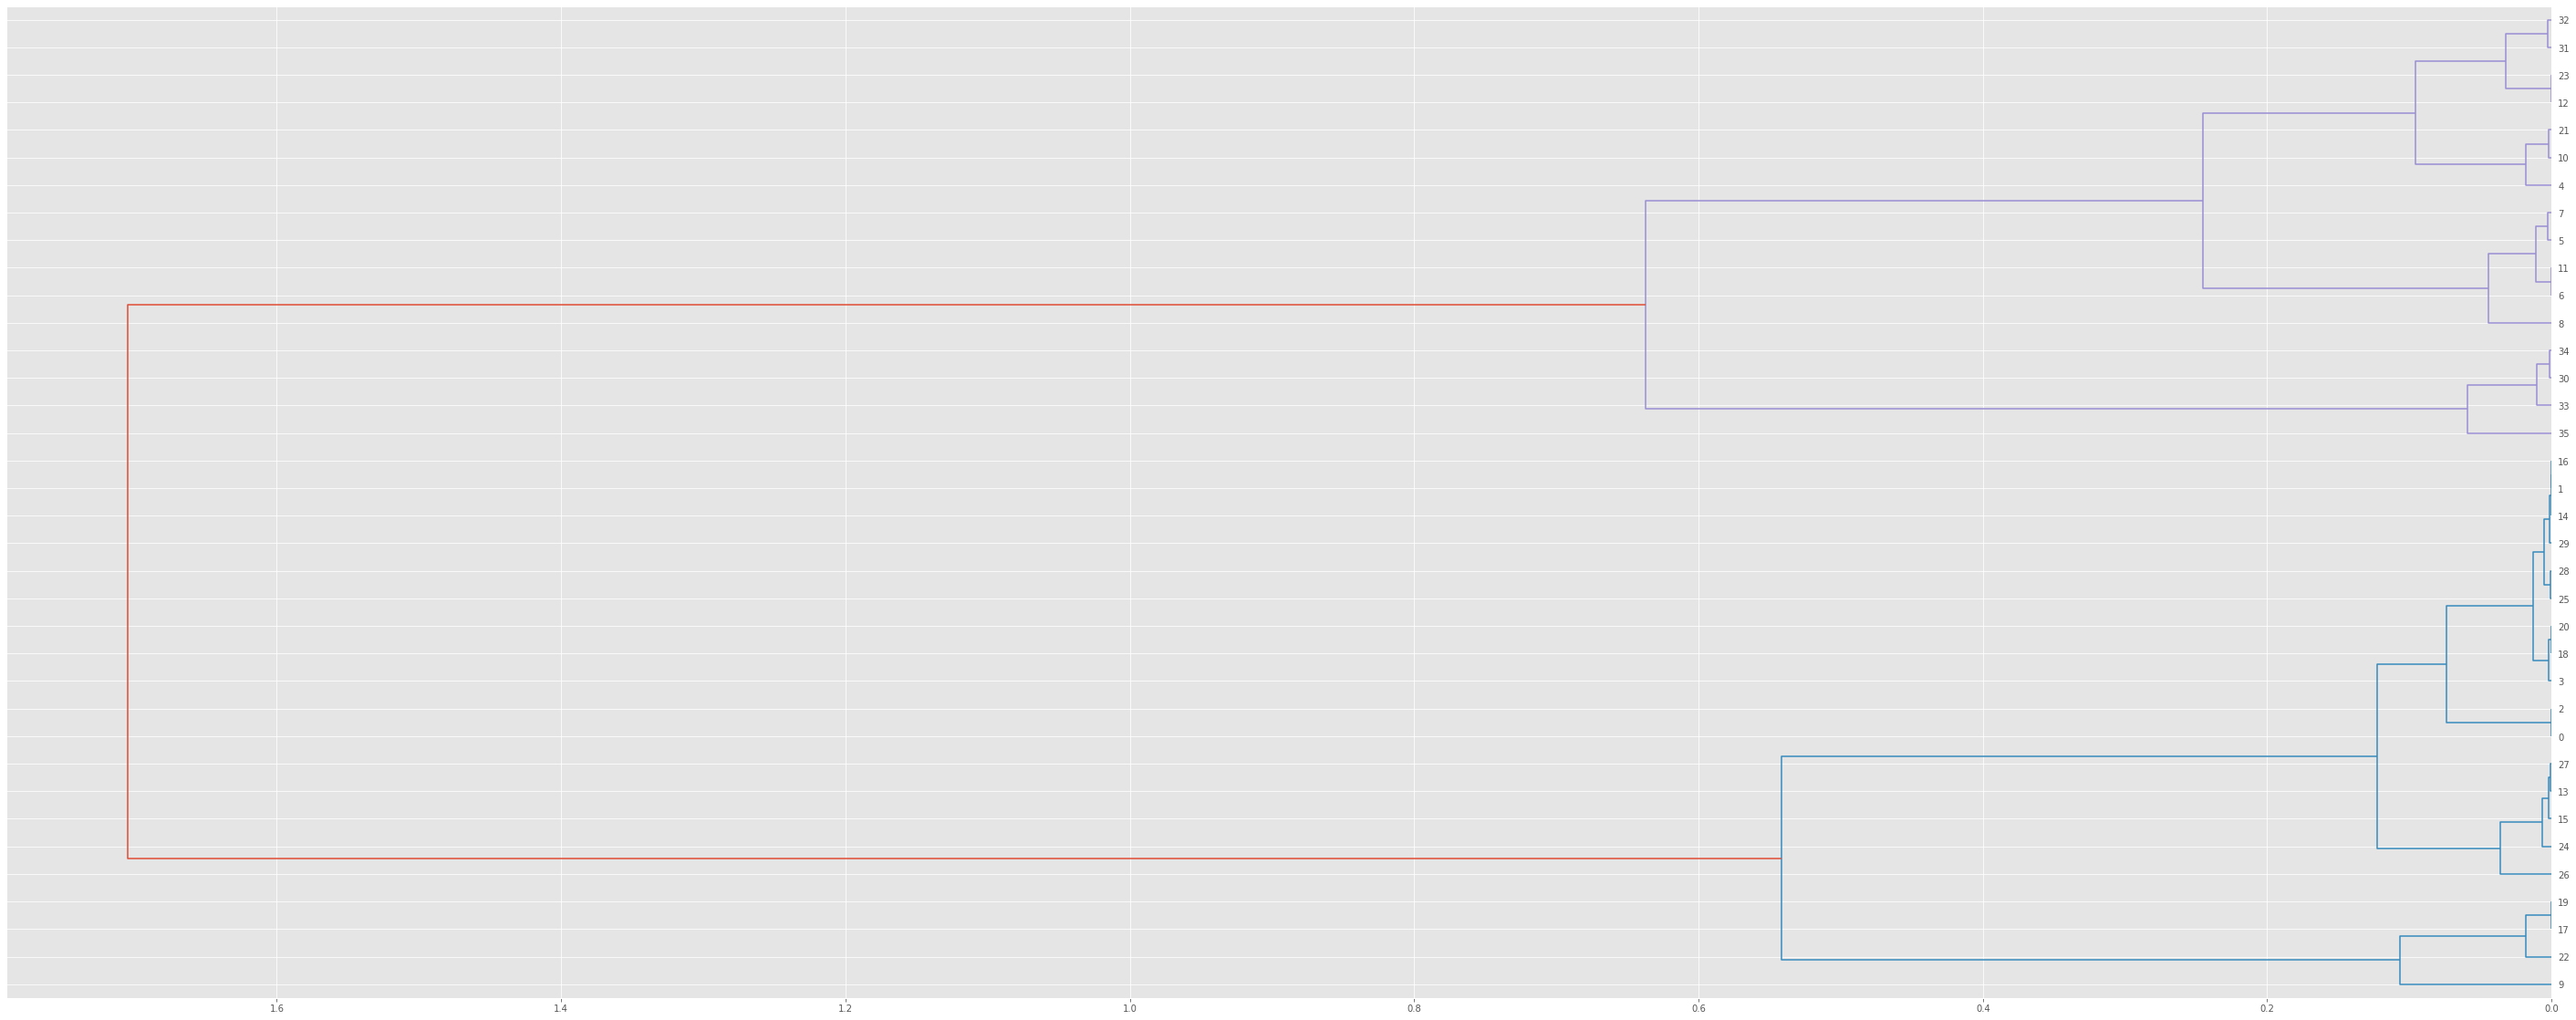

In [126]:
BestResult = linkage(X, method=clusterWay[indexMaxCoef][1], metric=clusterWay[indexMaxCoef][0]) 
dendResult = dendrogram(BestResult, orientation='left', leaf_font_size=10)

## ElbowMethod

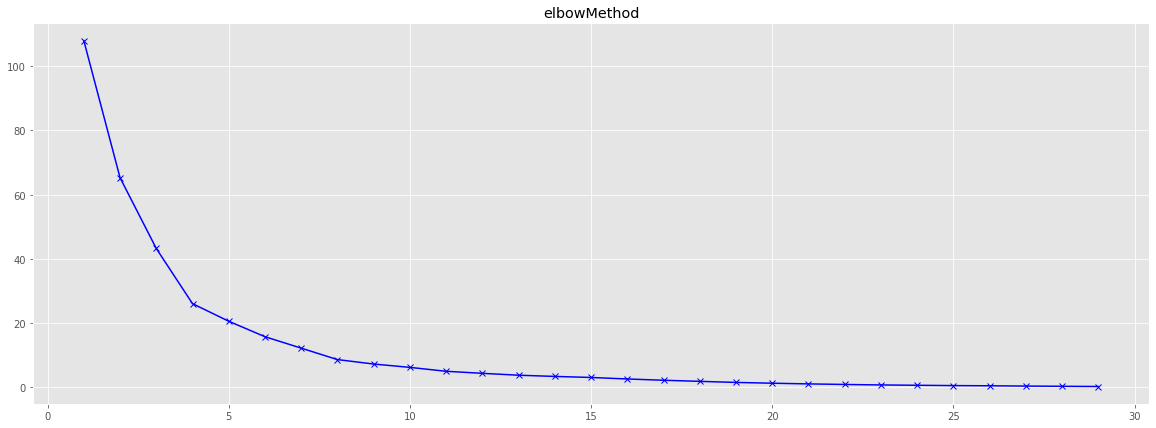

In [127]:
def elbowMethod():
    K = range(1, 30)
    sumOfSquareDist = []

    for k in K:
        km = KMeans(n_clusters=k, init="k-means++")
        km = km.fit(X)
        sumOfSquareDist.append(km.inertia_)

    plt.rcParams['figure.figsize'] = (20,7)
    plt.plot(K, sumOfSquareDist, 'bx-')
    plt.title('elbowMethod')
    plt.show()

elbowMethod()

## Fcluster

In [128]:
countCluster = 8
label = fcluster(
    Z=BestResult,
    t=countCluster,
    criterion='maxclust'
)
np.unique(label)

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [129]:
concatDF.loc[:, 'cluster'] = label

In [130]:
arrayClusterItems = list(range(countCluster))
for i, group in concatDF.groupby('cluster'):
    print('='*10)
    print(i)
    print(group)
    arrayClusterItems[i - 1] = group

1
            humidity     pressure  temperature  cluster
Nashville  68.237332  1020.369766   288.566325        1
Atlanta    70.848187  1020.685789   289.772703        1
Charlotte  70.186728  1020.092988   288.897490        1
2
         humidity     pressure  temperature  cluster
Denver  53.021656  1011.976642    282.83941        2
3
               humidity     pressure  temperature  cluster
Kansas City   66.633925  1016.281948   286.641671        3
Saint Louis   70.610192  1019.566990   286.675954        3
Pittsburgh    70.360087  1019.255232   284.053936        3
Philadelphia  68.017524  1020.250171   285.374143        3
New York      66.655249  1017.018540   285.393389        3
4
                humidity     pressure  temperature  cluster
Vancouver      81.899697  1018.118666   283.865067        4
Portland       74.700617  1019.268358   284.992929        4
San Francisco  76.877643  1018.846684   288.153090        4
Seattle        77.158023  1021.001215   284.409599        4
Minneapo

## Centroids

In [131]:
arrayCentroidClusters = list(range(countCluster))
for i, group in concatDF.groupby('cluster'):
    arr = [0] * 3
    for j in group.drop(['cluster'], 1).values:
        arr[0] += j[0]
        arr[1] += j[1]
        arr[2] += j[2]
    length = len(group.drop(['cluster'], 1).values)
    arrayCentroidClusters[i - 1] = [arr[0]/length, arr[1]/length, arr[2]/length]

## Distances

In [132]:
pdist(arrayCentroidClusters)

array([19.74032449,  4.15286637,  7.88105571, 13.15727409, 21.19008162,
        4.47012745,  9.64502225, 16.97641516, 23.16711788, 24.12872502,
        9.6876277 , 19.95503033, 19.48881776,  7.0177279 , 13.76324057,
       20.1961186 ,  7.37953277, 11.23503972, 14.0183037 , 27.17334249,
       11.27495129, 15.30782157, 25.9617867 , 10.92826501,  8.9512052 ,
       19.97369227, 18.68254996,  5.50492892])

## Visualization Clusters

In [133]:
plt.rcParams['figure.figsize'] = (50,20)
arr = [[0]*countCluster] * 3
for i in range(len(arrayCentroidClusters)):
    arr[0][i] = arrayCentroidClusters[i][0]
    arr[1][i] = arrayCentroidClusters[i][1]
    arr[2][i] = arrayCentroidClusters[i][2]
    
arrayCentroidClustersDF = pd.DataFrame(arrayCentroidClusters, columns=['humidity', 'pressure', 'temperature'])
centFig = go.Scatter3d(x=arrayCentroidClustersDF['humidity'], y=arrayCentroidClustersDF['pressure'], z=arrayCentroidClustersDF['temperature'],
marker=dict(opacity=0.9, reversescale=True, colorscale='turbo', size=5), line=dict (width=0.02), mode='markers')

In [134]:
colors = ['blues', 'reds', 'oranges', 'greens', 'delta', 'cividis', 'twilight', 'ylgn']
arrayFigs = list(range(countCluster))
for i, group in concatDF.groupby('cluster'):
    arrayFigs[i - 1] = go.Scatter3d(x=group['humidity'], y=group['pressure'], z=group['temperature'], 
    marker=dict(opacity=0.9, reversescale=True, colorscale=colors[i - 1], size=5), line=dict (width=0.02), mode='markers')

In [135]:
plotly.offline.plot({"data": [arrayFigs[0], arrayFigs[1], arrayFigs[2], arrayFigs[3], arrayFigs[4], arrayFigs[5], arrayFigs[6], arrayFigs[7], centFig],
                     "layout": mylayout},
                     filename=("3DPlot.html"))

'3DPlot.html'